In [26]:
%pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install pycaret[full]

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl.metadata (2.4 kB)
  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached pyod-2.0.4-py3-none-any.whl
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Using cached importlib_metadata-8.6.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-a

In [2]:
import pandas as pd
data = pd.read_csv('final_data.csv')
data = data.dropna()
print(data.shape)

(695, 19)


In [3]:
print(data.head())

                     name                                            address  \
0      Xanadu Residence 2  JVC District 13, Jumeirah Village Circle (JVC)...   
1      Park Ridge Tower C              Park Ridge, Dubai Hills Estate, Dubai   
2  Collective 2.0 Tower A          Collective 2.0, Dubai Hills Estate, Dubai   
3              Zada Tower                                Business Bay, Dubai   
4        Azizi Riviera 36      Azizi Riviera, Meydan One, Meydan City, Dubai   

        type  no_bedrooms  no_bathrooms  area  latitude  longitude     2025  \
0  Apartment            2             2  1343   25.0571    55.2111  1400000   
1  Apartment            2             2  1002   25.0995    55.2760  2550000   
2  Apartment            1             1   743   25.0990    55.2770  1800000   
3  Apartment            1             1   466   25.1841    55.2722  1050000   
4  Apartment            1             1   378   25.1786    55.3342   777000   

      2024     2023     2022     2021     20

In [21]:
neighborhoods = data['address'].str.split(',')
neighborhoods = neighborhoods.str.get(-2)
cleaned_data = data
cleaned_data['neighborhood'] = neighborhoods
cleaned_data.drop(['name', 'address'], axis=1, inplace=True) 
print(cleaned_data.head())

        type  no_bedrooms  no_bathrooms  area  latitude  longitude     2025  \
0  Apartment            2             2  1343   25.0571    55.2111  1400000   
1  Apartment            2             2  1002   25.0995    55.2760  2550000   
2  Apartment            1             1   743   25.0990    55.2770  1800000   
3  Apartment            1             1   466   25.1841    55.2722  1050000   
4  Apartment            1             1   378   25.1786    55.3342   777000   

      2024     2023     2022     2021     2020     2019     2018     2017  \
0  1350000  1300000  1250000  1200000  1150000  1100000  1050000  1000000   
1  2500000  2450000  2400000  2350000  2300000  2250000  2200000  2150000   
2  1750000  1700000  1650000  1600000  1550000  1500000  1450000  1400000   
3  1020000   990000   960000   930000   900000   870000   840000   810000   
4   760000   740000   720000   700000   680000   660000   640000   620000   

      2016     2015                    neighborhood  
0   9500

In [24]:
from pycaret.regression import *
s = setup(cleaned_data, target = '2025', session_id = 123)

,Description,Value
0,Session id,123
1,Target,2025
2,Target type,Regression
3,Original data shape,"(695, 18)"
4,Transformed data shape,"(695, 21)"
5,Transformed train set shape,"(486, 21)"
6,Transformed test set shape,"(209, 21)"
7,Numeric features,15
8,Categorical features,2
9,Preprocess,True


In [25]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,540.9792,9477679.3273,1989.6048,1.0000,0.0002,0.0001,0.0430
omp,Orthogonal Matching Pursuit,8504.5091,1600715667.4911,14669.5842,1.0000,0.0015,0.0010,0.0190
lasso,Lasso Regression,595.9189,11056272.8367,2283.6406,1.0000,0.0003,0.0001,0.0200
par,Passive Aggressive Regressor,514.1942,9581269.9212,1995.2680,1.0000,0.0003,0.0001,0.0190
br,Bayesian Ridge,458.1433,9465190.6959,1951.7254,1.0000,0.0002,0.0001,0.0240
huber,Huber Regressor,293.3211,9348244.2886,1819.0303,1.0000,0.0002,0.0000,0.0220
llar,Lasso Least Angle Regression,565.0431,10836300.5196,2235.5420,1.0000,0.0003,0.0001,0.0260
en,Elastic Net,545.8383,11033194.1966,2265.9347,1.0000,0.0003,0.0001,0.0280
ridge,Ridge Regression,513.6226,9469415.7585,1975.1548,1.0000,0.0002,0.0001,0.0240
et,Extra Trees Regressor,106849.3687,152506536286.7894,338849.3388,0.9984,0.0185,0.0079,0.0540


In [31]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1550887.6467,4582618016067.9346,2140705.0278,0.2023,0.8187,1.0155
1,1905597.2156,7331098672893.8164,2707600.1686,0.1879,0.8925,1.1251
2,2115712.4312,8137961049823.7539,2852711.1753,0.0508,0.8821,1.0637
3,2107977.7441,10638524836153.1895,3261675.1580,0.0572,1.0586,1.5675
4,1048742.9386,1866797621143.7107,1366308.0257,0.0212,0.6875,0.8335
5,1673879.6668,4494261199533.3604,2119967.2638,0.0621,0.8631,1.1862
6,1379543.8950,2703226947354.6606,1644149.3081,0.0036,0.8045,1.0745
7,1030604.3052,1374462439916.2412,1172374.7012,-0.0345,0.7486,1.0044
8,1579964.0249,6521378054274.5312,2553698.8966,0.0548,0.8289,1.0007


In [32]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1516733.8078,4659274249019.1230,2158535.2091,0.1890,0.7964,0.9464
1,1809066.0947,6784965477049.2227,2604796.6287,0.2484,0.8370,1.0017
2,1901971.6970,7318505904405.6416,2705273.7208,0.1464,0.8270,0.9468
3,1920734.7028,10154105618674.0449,3186550.7400,0.1001,0.9869,1.3343
4,1001291.9901,1741768522412.0530,1319760.7823,0.0868,0.6530,0.7561
5,1607887.2833,4291986253995.0674,2071710.9485,0.1043,0.8203,1.0798
6,1339525.7998,2509604916896.9570,1584173.2597,0.0750,0.7737,1.0136
7,1021302.3896,1332388084082.1155,1154291.1609,-0.0028,0.7401,0.9865
8,1503143.5441,5982023581635.2998,2445817.5692,0.1330,0.7900,0.9209


Fitting 10 folds for each of 10 candidates, totalling 100 fits


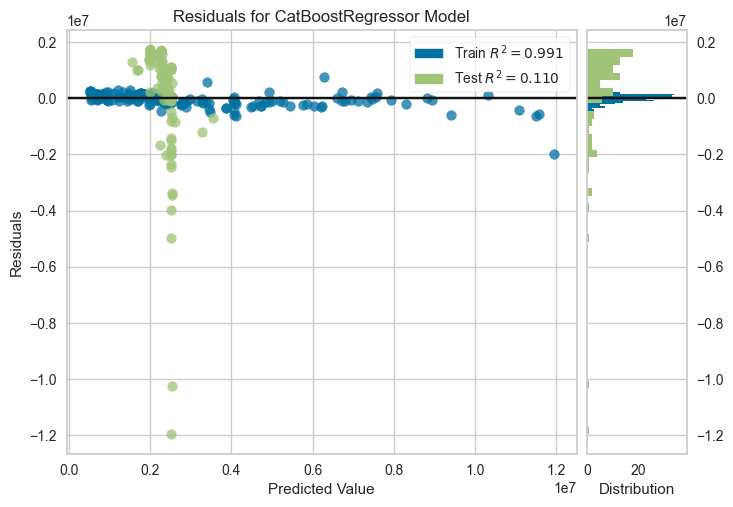

In [38]:
plot_model(tuned_best, plot = 'residuals')

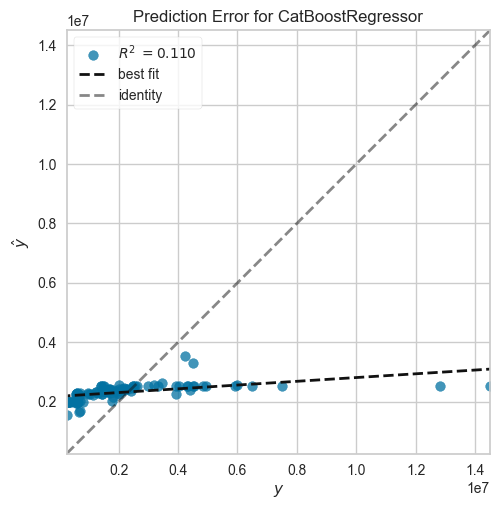

In [39]:
plot_model(tuned_best, plot = 'error')

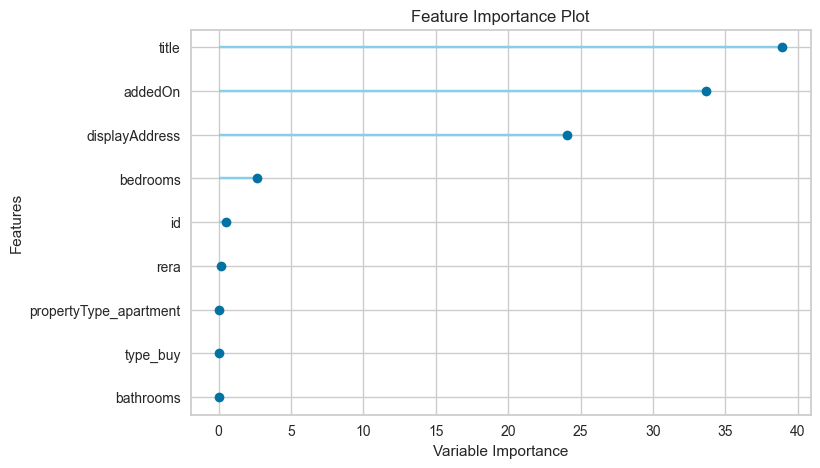

In [40]:
plot_model(tuned_best, plot = 'feature')

In [41]:
holdout_pred = predict_model(tuned_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1388012.0560,4602766345902.9160,2145405.8697,0.1096,0.9073,1.2786


In [42]:
save_model(tuned_best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['id', 'bathrooms', 'bedrooms',
                                              'rera'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['title', 'displayAddress',
                                              'addedOn', 'type',
                                              'propertyType'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  Transfor...
                                     transformer=OneHotEncoder(cols=['type',
                                                                     'propertyType'],
                                                               handle_missing='return_nan',
                                                               us

In [1]:
# create api
create_api(tuned_best, 'testapi')

# run api
!python test.py

NameError: name 'create_api' is not defined